In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('seeds_dataset.csv')

In [3]:
df.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df['seedType'].value_counts()

3    70
2    70
1    70
Name: seedType, dtype: int64

In [5]:
df.shape

(210, 9)

In [6]:
df.isnull().sum()

ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

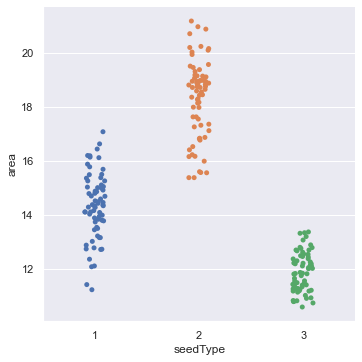

In [7]:
sns.catplot(y="area", x="seedType", data=df);

c:\users\bhupesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


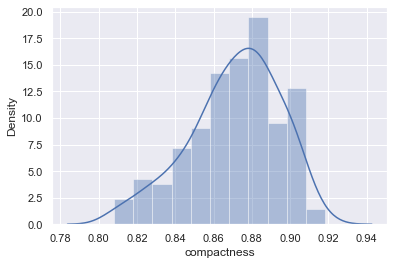

In [8]:
sns.distplot(df['compactness'],kde=True);

In [9]:
df.describe()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,105.500000,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,60.765944,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,1.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,53.250000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,105.500000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,157.750000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,210.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
df.corr()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
ID,1.000000,-0.353409,-0.343198,-0.464282,-0.287088,-0.412692,0.529982,-0.017875,0.942820
area,-0.353409,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,-0.343198,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,-0.464282,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,-0.287088,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,-0.412692,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,0.529982,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,-0.017875,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,0.942820,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


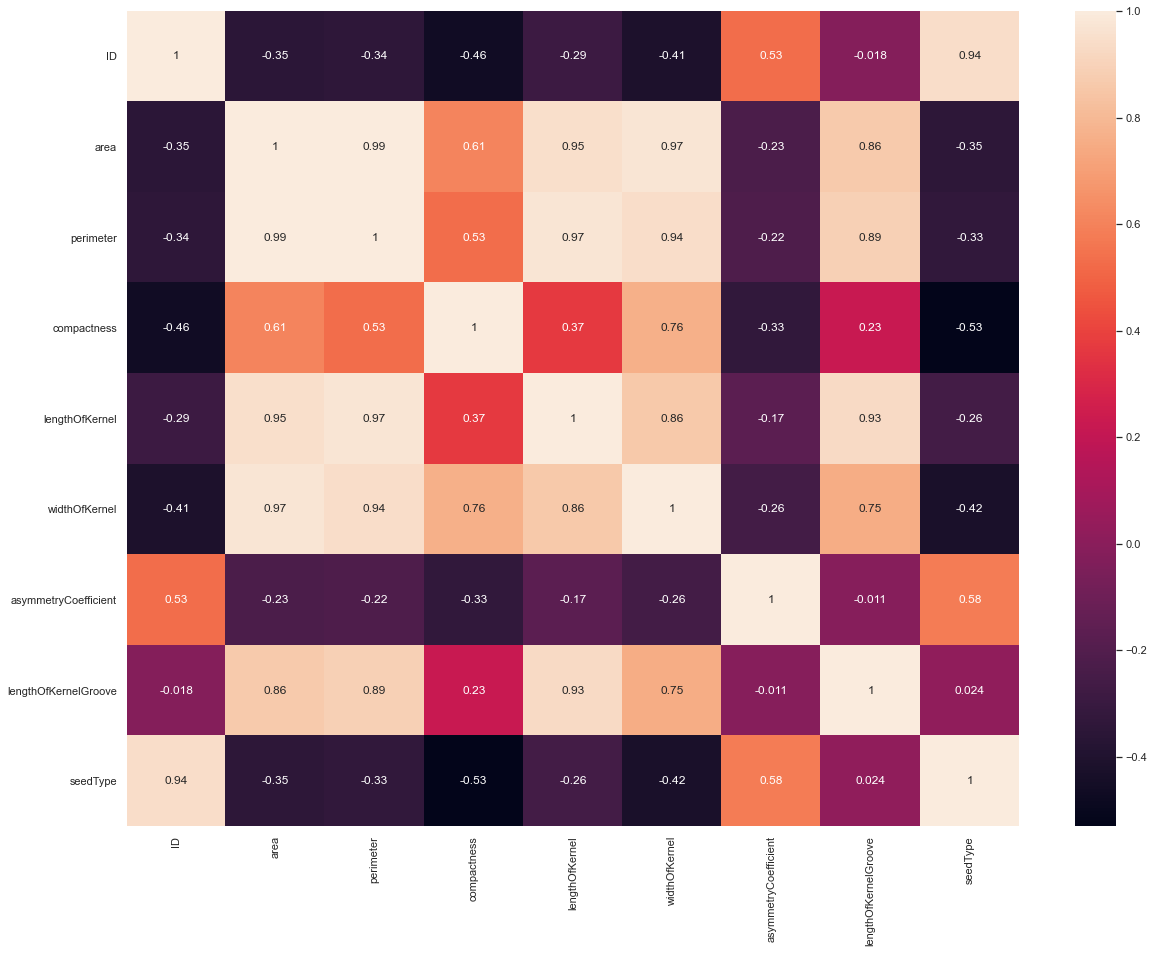

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);

In [12]:
y=df['seedType']

In [13]:
x=df.drop(['ID','seedType'],axis=1)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)

In [15]:
scale=MinMaxScaler()

In [16]:
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [17]:
models={'Logistic Regression': LogisticRegression(),
        'Decision tree':DecisionTreeClassifier(),
        'KNN':KNeighborsClassifier(n_neighbors=2),
        'Gaussian':GaussianNB(),
        'svc':SVC(),
       'Random_forest': RandomForestClassifier()}

In [18]:
model_test_score={}
model_train_score={}

for name,model in models.items():
    model.fit(x_train,y_train)
    model_test_score[name]=model.score(x_test,y_test)
    model_train_score[name]=model.score(x_train,y_train)

In [19]:
 model_test_score

{'Logistic Regression': 0.9206349206349206,
 'Decision tree': 0.9206349206349206,
 'KNN': 0.9365079365079365,
 'Gaussian': 0.9047619047619048,
 'svc': 0.9365079365079365,
 'Random_forest': 0.9206349206349206}

In [20]:
model_train_score

{'Logistic Regression': 0.9387755102040817,
 'Decision tree': 1.0,
 'KNN': 0.9659863945578231,
 'Gaussian': 0.9047619047619048,
 'svc': 0.9523809523809523,
 'Random_forest': 1.0}

In [21]:
df1= pd.DataFrame(model_test_score,index=['Test_accuracy'])
df1

,Logistic Regression,Decision tree,KNN,Gaussian,svc,Random_forest
Test_accuracy,0.920635,0.920635,0.936508,0.904762,0.936508,0.920635


In [22]:
df1=df1.transpose()

In [23]:
df1['Train_accuracy']=model_train_score.values()

In [24]:
df1['Difference']= (df1['Train_accuracy']-df1['Test_accuracy'])*100

In [25]:
df1

,Test_accuracy,Train_accuracy,Difference
Logistic Regression,0.920635,0.938776,1.814059
Decision tree,0.920635,1.000000,7.936508
KNN,0.936508,0.965986,2.947846
Gaussian,0.904762,0.904762,0.000000
svc,0.936508,0.952381,1.587302
Random_forest,0.920635,1.000000,7.936508


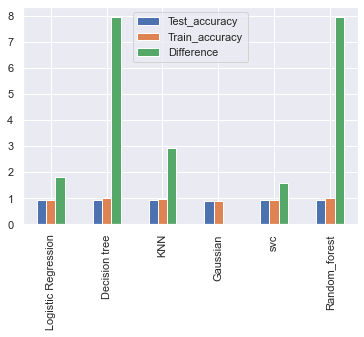

In [26]:
df1.plot.bar();

In [27]:
# Here in the above results i found our SVC model give me the highest accuracy of 93% and it is the best fit model
# so i go with logistic SVC model

In [28]:
svm=SVC()

In [29]:
svm.fit(x_train,y_train)

SVC()

In [30]:
svm.score(x_test,y_test)

0.9365079365079365

In [31]:
# using cross_validation for logistic regression
cv_acc=cross_val_score(svm,x,y,cv=5)

In [32]:
cv_acc

array([0.97619048, 0.92857143, 0.92857143, 0.92857143, 0.66666667])

In [33]:
np.mean(cv_acc)

0.8857142857142858

In [34]:
#making prediction
y_pred=svm.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9365079365079365

In [36]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[17  1  3]
 [ 0 21  0]
 [ 0  0 21]]


In [37]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.81      0.89        21
           2       0.95      1.00      0.98        21
           3       0.88      1.00      0.93        21

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.93        63
weighted avg       0.94      0.94      0.93        63

